<h1><center>Natural Language Processing Assignment</center></h1>

### Sentence-level Aspect Based Sentiment Analysis

Part 1 - Sentence-level Aspect Based Sentiment Analysis:

In the first part, given an input sentence, identify and annotate the aspect category and the sentiment polarity towards the given category.

To help develop my algorithm, The Xml File was Parsed andd stored in a dataframe. This allow the segmentation of the text, E#A and polarity. The E#A was segmented into Entity and Attribute. Pre-processing was carried out by tokenizing, removing stop words, peforming stemmatization and lemmatisation.

Perform feature extraction to convert the textual data to numerical data (in view): CountVectorizer and TFIDF Vectorizer was used to perform feature extraction and convert the textual data to numerical one.

Train the model: The model is splitted and trained using Naive Bayes Classifier. it was also evaluated to calculate the confusion matrix, precision, recall and f1-score. From the evaluation, the Countvectorizer performed well with the accuracy of 70% compared to the TFIDF vectorizer whixh has 63%. The model was then used on the test data and performed well. 

In [151]:
import xml.etree.ElementTree as ET
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tabulate import tabulate 

# Load the XML file
tree = ET.parse('Laptops_Train_p1.xml')
root = tree.getroot()

# Create an empty list to store the results
results_list = []

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text
        opinions = sentence.find('Opinions')
        
        # If there are opinions, extract the category and polarity for each opinion and store them in a list of dictionaries
        if opinions is not None:
            for opinion in opinions:
                category = opinion.get('category')
                polarity = opinion.get('polarity')
                
                # Extract the aspect entity and attribute from the opinion category
                if '#' in category:
                    entity, attribute = category.split('#')
                else:
                    entity = ''
                    attribute = ''
                    
                # Assign the polarity label to the E#A pair based on the polarity value in the opinion
                if polarity == 'positive':
                    label = 'positive'
                elif polarity == 'negative':
                    label = 'negative'
                else:
                    label = 'neutral'
                
                # Append the text, aspect categories, polarity, and sentence ID to the results list
                results_list.append({'text': text, 'Sentence ID': sentence_id, 'Aspect Entity': entity, 'Aspect Attribute': attribute, 'Polarity': label})
        
        # If there are no opinions, create a neutral entry for the sentence
        else:
            results_list.append({'text': text, 'Sentence ID': sentence_id, 'Aspect Entity': '', 'Aspect Attribute': '', 'Polarity': 'neutral'})
        
# Convert the results list to a dataframe and print only the Aspect Entity and Aspect Attribute columns
results_df = pd.DataFrame(results_list)
print(tabulate(results_df, headers='keys', tablefmt='psql'))


+------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------+--------------------+-----------------------+------------+
|      | text                                                                                                                                                                                                                                                                                                                                                                                                             | Sentence ID                      | Aspect Entity      | Aspect Attribute      | Pol

In [152]:
# Convert the results list to a dataframe
results_df = pd.DataFrame(results_list)

# Extract entity, attribute, and text columns and create a new dataframe
opinions_list_df = results_df[['Aspect Entity', 'Aspect Attribute', 'text']]

    # Print the opinions values in a table format
# print(tabulate(opinions_list_df, headers='keys', tablefmt='psql'))
 

In [153]:
# # Convert the results list to a dataframe
# results_df = pd.DataFrame(results_list)

# # Extract entity, attribute, and text columns and create a new dataframe
# sentiments_df = results_df[['text', 'Polarity']]

# # Print the opinions values in a table format
# print(tabulate(sentiments_df, headers='keys', tablefmt='psql'))
 

In [154]:

# Parse the XML file
tree = ET.parse('Laptops_Train_p1.xml')

# Get the root element of the XML tree
root = tree.getroot()

# Iterate over the sentences and print their text
for review in root:
    for sentence in review.find('sentences'):
        sentence_text = sentence.find('text').text
        # print(sentence_text)

len(root)


450

In [155]:

nltk.download('stopwords')
  
# Load the XML file
tree = ET.parse('Laptops_Train_p1.xml')
root = tree.getroot()

# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Get the set of English stopwords
stopword_set = set(stopwords.words('english'))

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text.lower()
        opinions = sentence.find('Opinions')
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Remove stopwords from the tokens
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_set]
        
         # Create a lemmatizer object
        lemmatizer = WordNetLemmatizer()
        
        # Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/motunrayo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [156]:
results_df.head()

text Sentence ID  \
0                  Being a PC user my whole life....        79:0   
1             This computer is absolutely AMAZING!!!        79:1   
2                        10 plus hours of battery...        79:2   
3  super fast processor and really nice graphics ...        79:3   
4  super fast processor and really nice graphics ...        79:3   

  Aspect Entity       Aspect Attribute  Polarity  
0                                        neutral  
1        LAPTOP                GENERAL  positive  
2       BATTERY  OPERATION_PERFORMANCE  positive  
3           CPU  OPERATION_PERFORMANCE  positive  
4      GRAPHICS                GENERAL  positive

In [157]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              3370 non-null   object
 1   Sentence ID       3370 non-null   object
 2   Aspect Entity     3370 non-null   object
 3   Aspect Attribute  3370 non-null   object
 4   Polarity          3370 non-null   object
dtypes: object(5)
memory usage: 131.8+ KB


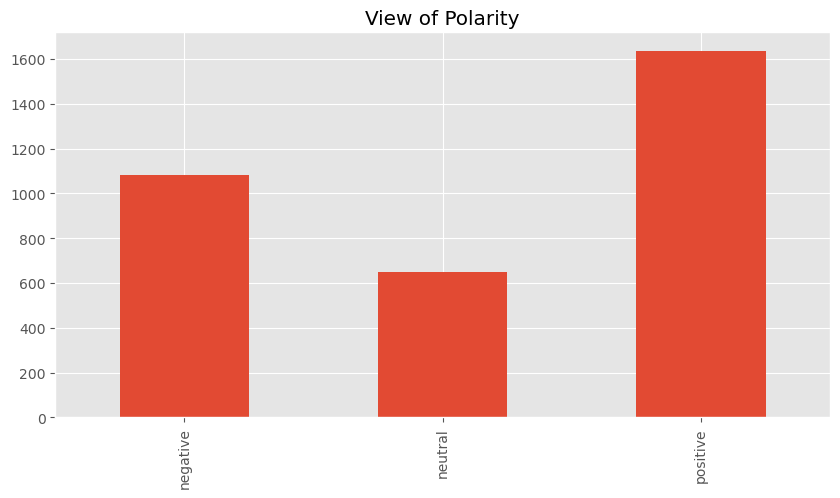

In [158]:
results_df['Polarity'].value_counts().sort_index().plot(kind='bar', title='View of Polarity', figsize=(10, 5))
plt.show()

In [159]:

#download NLTK models for POS tagging
nltk.download('averaged_perceptron_tagger')

# parse the XML file and extract the sentences
tree = ET.parse('Laptops_Train_p1.xml')

# Get the root element of the XML tree
root = tree.getroot()

for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()
        # print(text)

# Perform POS tagging on the sentences

        tokens = nltk.word_tokenize(text)
        pos_tags = nltk.pos_tag(tokens)
        # print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/motunrayo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Build the Classifier and Evaluate the Model

The Training dataset is splitted. Countvectorizer and Tfidfvectorizer was used to perform feature extraction and compared with each other. The training data was then trained using Naive Bayes Classifier. The confusion matrix and classification report was evaluated and countvectorizer performed better than tfidf in terms of accuracy of 70% compared to 60% in tfidf. 

In [160]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

In [161]:
# Feature Selection using TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
results_df = pd.DataFrame(results_list)

In [163]:
X = results_df['text']
y = results_df['Polarity']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

In [165]:
# print(y)

In [166]:
# Perform feature extraction with the training using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Fit with the train data with test set
X_test_tfidf = tfidf.transform(X_test) 

In [167]:
# # Print the vocabulary and the document-term matrix
# print('Vocabulary:', tfidf.vocabulary_)

In [168]:
print('Document-term matrix:', X_train_tfidf.toarray())

Document-term matrix: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.50993711 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [169]:
tfidf.get_feature_names_out()[:20]

array(['00', '04', '07', '09', '10', '100', '1000', '1024', '11',
       '1200bk', '1222nr', '13', '14', '15', '150', '1500', '16', '165',
       '17', '175'], dtype=object)

In [170]:
print(f'We have {len(tfidf.vocabulary_)} vocabulary words in our vectorizer')

We have 3102 vocabulary words in our vectorizer


In [171]:
# print('Document-term matrix:', X_train_tfidf.toarray())

In [172]:
# Feature Selection Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [173]:
results_df = pd.DataFrame(results_list)

In [174]:
X = results_df['text']
y = results_df['Polarity']

In [175]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

In [176]:
# print(y)

In [177]:
vectorizer = CountVectorizer()

# we fit the count vectorizer with the train data
X_train_counts = vectorizer.fit_transform(X_train)

# we fit with the train data with test set
X_test_counts = vectorizer.transform(X_test)                                           

In [178]:
# print(vectorizer.vocabulary_)

In [179]:
vectorizer.get_feature_names_out()[:20]

array(['00', '04', '07', '09', '10', '100', '1000', '1024', '11',
       '1200bk', '1222nr', '13', '14', '15', '150', '1500', '16', '165',
       '17', '175'], dtype=object)

In [180]:
print(f'We have {len(vectorizer.vocabulary_)} vocabulary words in our vectorizer')

We have 3102 vocabulary words in our vectorizer


In [181]:
print(X_train_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [182]:
# import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)

In [183]:
#Train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [184]:

# Train the Naive Bayes classifier
clf = MultinomialNB()

# Fit the model
clf.fit(X_train_counts, y_train)


MultinomialNB()

In [185]:
#Evaluate Model on testing set
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [186]:
y_pred_count = clf.predict(X_test_counts)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred_count)
print("\n\nClassification Report\n")
print(cr)


Confusion Matrix

[[160   9  47]
 [ 49  39  49]
 [ 34  12 275]]


Classification Report

              precision    recall  f1-score   support

    negative       0.66      0.74      0.70       216
     neutral       0.65      0.28      0.40       137
    positive       0.74      0.86      0.79       321

    accuracy                           0.70       674
   macro avg       0.68      0.63      0.63       674
weighted avg       0.70      0.70      0.68       674



In [187]:
tfidf_nb = MultinomialNB()

# Fit the model
tfidf_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [188]:
#Evaluate Model on testing set
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [189]:
y_pred_count = tfidf_nb.predict(X_test_counts)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

[[121   0  95]
 [ 32   3 102]
 [ 23   0 298]]


In [190]:
# Print the Classification Report
cr = classification_report(y_test, y_pred_count)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

    negative       0.69      0.56      0.62       216
     neutral       1.00      0.02      0.04       137
    positive       0.60      0.93      0.73       321

    accuracy                           0.63       674
   macro avg       0.76      0.50      0.46       674
weighted avg       0.71      0.63      0.55       674



In [191]:
X = results_df['text'] 
yt = results_df['Aspect Entity']

In [192]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size = 0.2, random_state=42, shuffle=True)

In [193]:
vectorizer = CountVectorizer()

# we fit the count vectorizer with our train data
X_train_count = vectorizer.fit_transform(X_train)

# we fit with our train data with test set
X_test_count = vectorizer.transform(X_test)                                           

In [194]:
#Train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [195]:
# Train the Naive Bayes classifier
clft = MultinomialNB()

# Fit the model
clft.fit(X_train_counts, y_train)

MultinomialNB()

In [196]:
y_pred_count = clft.predict(X_test_count)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

[[ 20   0   0   0   1   0   0   0   0  75   0   0   0   0   0   0   0   0
    2]
 [  0   3   0   0   0   0   0   0   0  22   0   0   0   0   0   0   0   0
    0]
 [  0   0   1   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0
    0]
 [  0   1   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    1]
 [  0   1   0   0   3   0   0   0   1  21   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   1   0   5   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    1]
 [  0   0   0   0   1   0   0   0   4  17   0   0   0   0   0   0   0   0
    0]
 [  9   0   0   0   0   0   0   0   0 359   0   0   0   1   0   0   0   1
    2]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1]
 [  1   0 

In [197]:
# Print the Classification Report
cr = classification_report(y_test, y_pred_count)
print("\n\nClassification Report\n")
print(cr)



Classification Report

                    precision    recall  f1-score   support

                         0.48      0.20      0.29        98
           BATTERY       0.60      0.12      0.20        25
           COMPANY       1.00      0.08      0.14        13
               CPU       0.00      0.00      0.00         4
           DISPLAY       0.60      0.12      0.19        26
          GRAPHICS       0.00      0.00      0.00         6
          HARDWARE       0.00      0.00      0.00         2
         HARD_DISC       0.00      0.00      0.00         2
          KEYBOARD       0.80      0.18      0.30        22
            LAPTOP       0.62      0.97      0.75       372
            MEMORY       0.00      0.00      0.00         2
       MOTHERBOARD       0.00      0.00      0.00         2
             MOUSE       0.83      0.25      0.38        20
MULTIMEDIA_DEVICES       0.67      0.18      0.29        11
    OPTICAL_DRIVES       0.00      0.00      0.00         1
              

/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [198]:
X = results_df['text'] 
ytt = results_df['Aspect Entity']

In [199]:
vectorizer = CountVectorizer()

# we fit the count vectorizer with our train data
X_train_count = vectorizer.fit_transform(X_train)

# we fit with our train data with test set
X_test_count = vectorizer.transform(X_test)                                           

In [200]:
#Train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [201]:
# Train the Naive Bayes classifier
clft = MultinomialNB()

# Fit the model
clft.fit(X_train_counts, y_train)

MultinomialNB()

In [303]:
# y_pred_count = clft.predict(X_test_count)

# # Print the Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_count)
# print("Confusion Matrix\n")
# print(cm)

In [302]:
# # Print the Classification Report
# cr = classification_report(y_test, y_pred_count)
# print("\n\nClassification Report\n")
# print(cr)

### Evaluation of the Test Set using the training data. 

The section evalutates the test set and perform predictions and evaluate the performance on the data. The dataset was parsed through an XML file and the text was pre-processed. Countvectorize/Tfidfvectorizer was then applyed on the text data. The trained classifier was then loaded and the trained model is then stored. The new test data is then passed through the trained classifier for prediction. After which it was then evaluated using precision, recall and f1-score. The accuracy of the model is 49%

In [204]:
import xml.etree.ElementTree as ET
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# Load the XML file
tree = ET.parse('Laptops_Test_p1_gold.xml')
root = tree.getroot()

# Create an empty list to store the text data
text_list = []
y_pred = []

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text
        text_list.append(text)

In [205]:
# Load the XML file
tree = ET.parse('Laptops_Test_p1_gold.xml')
root = tree.getroot()

# Create an empty list to store the text data
text_list = []
y_pred = []

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text
        text_list.append(text)
        opinions = sentence.find('Opinions')
        
        # If there are opinions, extract the category and polarity for each opinion and store them in a list of dictionaries
        if opinions is not None:
            for opinion in opinions:
                category = opinion.get('category')
                polarity = opinion.get('polarity')
                
                # Extract the aspect entity and attribute from the opinion category
                if '#' in category:
                    entity, attribute = category.split('#')
                else:
                    entity = ''
                    attribute = ''
                    
                # Assign the polarity label to the E#A pair based on the polarity value in the opinion
                if polarity == 'positive':
                    label = 'positive'
                elif polarity == 'negative':
                    label = 'negative'
                else:
                    label = 'neutral'
                
                # Append the text, aspect categories, polarity, and sentence ID to the results list
                y_pred.append({'text': text, 'Sentence ID': sentence_id, 'Aspect Entity': entity, 'Aspect Attribute': attribute, 'Polarity': label})
        
        # If there are no opinions, create a neutral entry for the sentence
        else:
            y_pred.append({'text': text, 'Sentence ID': sentence_id, 'Aspect Entity': '', 'Aspect Attribute': '', 'Polarity': 'neutral'})
        
# Convert the results list to a dataframe and print only the Aspect Entity and Aspect Attribute columns
text_df = pd.DataFrame(y_pred)
print(tabulate(text_df, headers='keys', tablefmt='psql'))


+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------+--------------------+-----------------------+------------+
|     | text                                                                                                                                                                                                                                                                                                                                 | Sentence ID                     | Aspect Entity      | Aspect Attribute      | Polarity   |
|-----+-------------------------------------------------------------------------------------------------------------------------------------------

In [206]:
# # Convert the results list to a dataframe
# text_df = pd.DataFrame(y_pred)

# # Extract entity, attribute, and text columns and create a new dataframe
# opinions_list1_df = text_df[['Aspect Entity', 'Aspect Attribute', 'text']]

# # Print the opinions values in a table format
# # print(tabulate(opinions_list1_df, headers='keys', tablefmt='psql'))
 

In [207]:

# Parse the XML file
tree = ET.parse('Laptops_Test_p1_gold.xml')

# Get the root element of the XML tree
root = tree.getroot()

# Iterate over the sentences and print their text
for review in root:
    for sentence in review.find('sentences'):
        sentence_text = sentence.find('text').text
        # print(sentence_text)

len(root)


80

In [208]:
#Tokenize the Sentences

tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text.lower()
        opinions = sentence.find('Opinions')
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Print the tokens
        # print(tokens)


In [209]:
# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Get the set of English stopwords
stopword_set = set(stopwords.words('english'))

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Remove stopwords from the tokens
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_set]
        
        # Print the filtered tokens
        # print(filtered_tokens)


In [210]:
# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Tokenize the sentence
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()

        tokens = tokenizer.tokenize(text)

# Create a lemmatizer object
        lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Print the lemmatized tokens
        # print(lemmatized_tokens)

In [211]:
# Get the root element of the XML tree
root = tree.getroot()

for review in root:
    for sentence in review.find('sentences'):
        sentence_text = sentence.find('text').text
        # print(sentence_text)

# Perform POS tagging on the sentences

        tokens = nltk.word_tokenize(sentence_text)
        pos_tags = nltk.pos_tag(tokens)
        # print(pos_tags)

In [212]:
# Load the trained classifier and vectorizer
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Save the trained model and vectorizer
joblib.dump(clf, 'classifier.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

# Load the saved model and vectorizer
clf = joblib.load('classifier.joblib')
vectorizer = joblib.load('vectorizer.joblib')

In [213]:

# Vectorize the text data
X_test_vect = vectorizer.transform(text_list)

# Make a prediction on the text data
y_pred = clf.predict(X_test_vect)

# Convert the results list to a dataframe
result_df = pd.DataFrame(text_list, y_pred)

In [214]:
# # Print the predictions
# print(tabulate(result_df, headers='keys', tablefmt='psql'))

In [215]:
#Evaluate Model on testing set
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [216]:
y_pred_ct = tfidf_nb.predict(X_test_vect)

In [217]:
# Print the Confusion Matrix
cm = confusion_matrix(y_pred, y_pred_ct)
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

[[  0   0   0   0   0   0   0   0   0  31  19  56]
 [  0   0   0   0   0   0   0   0   0   2   0   1]
 [  0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0 137   1 533]
 [  0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0  13   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


In [218]:
# Print the Classification Report
cr = classification_report(y_pred, y_pred_ct)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

                   0.00      0.00      0.00     106.0
     BATTERY       0.00      0.00      0.00       3.0
     COMPANY       0.00      0.00      0.00       2.0
     DISPLAY       0.00      0.00      0.00       2.0
    KEYBOARD       0.00      0.00      0.00       4.0
      LAPTOP       0.00      0.00      0.00     671.0
       MOUSE       0.00      0.00      0.00       2.0
          OS       0.00      0.00      0.00       2.0
     SUPPORT       0.00      0.00      0.00      16.0
    negative       0.00      0.00      0.00       0.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00     808.0
   macro avg       0.00      0.00      0.00     808.0
weighted avg       0.00      0.00      0.00     808.0



/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

In [219]:
y_pred_ct = clf.predict(X_test_vect)

The above code performs feature extraction on the training set, train the naive bayes classifier and evaluates the model. 

In [220]:
# X = results_df['text'] 
# yt = results_df['Aspect Entity']

In [221]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size = 0.2, random_state=42, shuffle=True)

In [222]:
# vectorizer = CountVectorizer()

# # we fit the count vectorizer with our train data
# X_train_count = vectorizer.fit_transform(X_train)

# # we fit with our train data with test set
# X_test_count = vectorizer.transform(X_test)                                           

In [223]:
#Train the Naive Bayes Classifier
# from sklearn.naive_bayes import MultinomialNB

In [224]:
# # Train the Naive Bayes classifier
# clft = MultinomialNB()

# # Fit the model
# clft.fit(X_train_counts, y_train)

In [225]:
# y_pred_count = clft.predict(X_test_count)

# # Print the Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_count)
# print("Confusion Matrix\n")
# print(cm)

In [226]:
# # Print the Classification Report
# cr = classification_report(y_test, y_pred_count)
# print("\n\nClassification Report\n")
# print(cr)

In [227]:
# tfidf_nb = MultinomialNB()

# # Fit the model
# tfidf_nb.fit(X_train_tfidf, y_train)

In [228]:
# y_pred_count = tfidf_nb.predict(X_test_counts)

# # Print the Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_count)
# print("Confusion Matrix\n")
# print(cm)

In [229]:
# # Print the Classification Report
# cr = classification_report(y_test, y_pred_count)
# print("\n\nClassification Report\n")
# print(cr)

In [230]:
# X = results_df['text'] 
# ytt = results_df['Aspect Attribute']

In [231]:
# vectorizer = CountVectorizer()

# # we fit the count vectorizer with our train data
# X_train_count = vectorizer.fit_transform(X_train)

# # we fit with our train data with test set
# X_test_count = vectorizer.transform(X_test)                                           

In [232]:
# #Train the Naive Bayes Classifier
# from sklearn.naive_bayes import MultinomialNB

In [233]:
# # Train the Naive Bayes classifier
# clft = MultinomialNB()

# # Fit the model
# clft.fit(X_train_counts, y_train)

In [234]:
# #Evaluate Model on testing set
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

In [235]:
# y_pred_count = clft.predict(X_test_count)

# # Print the Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_count)
# print("Confusion Matrix\n")
# print(cm)

In [236]:
# # Print the Classification Report
# cr = classification_report(y_test, y_pred_count)
# print("\n\nClassification Report\n")
# print(cr)

###  Text-level Aspect Based Sentiment Analysis



Part 2 - Text-level Aspect Based Sentiment Analysis:

The second task is similar in nature to the first, but now the aspect-based sentiment analysis is taken at the text (review) level. The same E#A categories from part 1 can be assigned, but now the sentiment polarity of the text can either be set to "positive", "negative", "neutral" or "conflict". The major difference here is that the dominant sentiment needs to be identified. Where this is not clear, then the "conflict" label should be applied. Also, an overall sentiment label will be assigned to the category "LAPTOP#GENERAL"  even if it was not included in the sentence-level annotations from part 1. 
Steps needed to develop the algorithm: 
In the second part, given an input sentence, identify and annotate the aspect category and the sentiment polarity towards the given category.

To help develop my algorithm, The Xml File was Parsed andd stored in a dataframe. This allow the segmentation of the text, E#A and polarity. The E#A was segmented into Entity and Attribute. Pre-processing was carried out by tokenizing, removal of unwanted words (stop words), peforming stemmatization and lemmatisation.

Perform feature extraction to convert the textual data to numerical data (in view): CountVectorizer and TFIDF Vectorizer was used to perform feature extraction and convert the textual data to numerical one.

Train the model: The model is splitted and trained using Naive Bayes Classifier. it was also evaluated to calculate the confusion matrix, precision, recall and f1-score. From the evaluation, the Countvectorizer performed well with the accuracy of 70% compared to the TFIDF vectorizer whixh has 63%. The model was then used on the test data and performed well. 


In [237]:
import xml.etree.ElementTree as ET
import pandas as pd
import nltk
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tabulate import tabulate 

In [238]:

# Load the XML file
tree = ET.parse('Laptops_Train_p2.xml')
root = tree.getroot()

# Create an empty list to store the results
results_list = []

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text
        opinions = sentence.find('Opinions')
        
        # If there are opinions, extract the category and polarity for each opinion and store them in a list of dictionaries
        if opinions is not None:
            polarities = []
            for opinion in opinions:
                category = opinion.get('category')
                polarity = opinion.get('polarity')
                
                # Extract the aspect entity and attribute from the opinion category
                if '#' in category:
                    entity, attribute = category.split('#')
                else:
                    entity = ''
                    attribute = ''
                    
                # Assign the polarity label to the E#A pair based on the polarity value in the opinion
                if polarity == 'positive':
                    polarities.append(1)
                elif polarity == 'negative':
                    polarities.append(-1)
                else:
                    polarities.append(0)
            
            # Determine the overall sentiment polarity for the sentence
            if 1 in polarities and -1 not in polarities:
                label = 'positive'
            elif -1 in polarities and 1 not in polarities:
                label = 'negative'
            elif -1 in polarities and 1 in polarities:
                label = 'neutral'
            else:
                label = 'conflict'
        
        # If there are no opinions, create a neutral entry for the sentence
        else:
            entity, attribute, label = 'LAPTOP', 'GENERAL', 'neutral'
        
        # Append the text, aspect categories, polarity, and sentence ID to the results list
        results_list.append({'text': text, 'Aspect Entity': entity, 'Aspect Attribute': attribute})
        
# Convert the results list to a dataframe and print the entity, attribute, and sentence text columns
results_df = pd.DataFrame(results_list)
print(tabulate(results_df[['text', 'Aspect Entity', 'Aspect Attribute']], headers='keys', tablefmt='psql'))


+------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+--------------------+
|      | text                                                                                                                                                                                                                                                                                                                                                                                                             | Aspect Entity   | Aspect Attribute   |
|------+------------------------------------------------------------------------------------------

In [239]:
import xml.etree.ElementTree as ET

# Load the XML file
tree = ET.parse('Laptops_Train_p2.xml')
root = tree.getroot()

sentiment = []

# Define a function to identify the dominant sentiment polarity of a set of opinions
def get_sentiment_polarity(opinions):
    polarities = [opinion.attrib['polarity'] for opinion in opinions]
    pos_num = polarities.count('positive')
    neg_num = polarities.count('negative')
    neu_num = polarities.count('neutral')
    conflict_num = polarities.count('conflict')
    if pos_num > neg_num and pos_num > neu_num and pos_num > conflict_num:
        return 'positive'
    elif neg_num > pos_num and neg_num > neu_num and neg_num > conflict_num:
        return 'negative'
    elif neu_num > pos_num and neu_num > neg_num and neu_num > conflict_num:
        return 'neutral'
    else:
        return 'conflict'

# Process each review
for review in root.findall('./Review'):
    review_id = review.attrib['rid']
    opinions = review.find('./Opinions')
    overall_sentiment = ''

    # Check if the category "LAPTOP#GENERAL" is included in the opinions
    laptop_general_opinions = opinions.findall("./Opinion[@category='LAPTOP#GENERAL']")
    if len(laptop_general_opinions) > 0:
        overall_sentiment = get_sentiment_polarity(laptop_general_opinions)
    
    # Process each sentence
    for sentence in review.findall('./sentences/sentence'):
        sentence_id = sentence.attrib['id']
        sentence_text = sentence.find('./text').text
        sentence_opinions = opinions.findall("./Opinion[@target='#" + sentence_id + "']")

        # Check if there are opinions for the sentence
        if len(sentence_opinions) > 0:
            sentiment_label = get_sentiment_polarity(sentence_opinions)
        else:
            sentiment_label = 'neutral'
        
        # If there is an overall sentiment, assign it to the sentence
        if overall_sentiment != '':
            sentiment_label = overall_sentiment
        
        sentiment.append({'Review': review_id, 'Sentence': sentence_id, 'Text': sentence_text, 'Polarity': sentiment_label})
            
# Convert the list of dictionaries to a pandas DataFrame and save to a CSV file
import pandas as pd
review_df = pd.DataFrame(sentiment)
review_df.to_csv('sentiment_labels.csv', index=False)


In [240]:
# read CSV file
df = pd.read_csv('sentiment_labels.csv')

In [241]:
print(df.head)

<bound method NDFrame.head of                              Review                          Sentence  \
0                               348                             348:0   
1                               348                             348:1   
2                               348                             348:2   
3                               285                             285:0   
4                               285                             285:1   
...                             ...                               ...   
2368  B00FU83YWS_260_A2YQ3TFBY1MASP  B00FU83YWS_260_A2YQ3TFBY1MASP:11   
2369  B00FU83YWS_260_A2YQ3TFBY1MASP  B00FU83YWS_260_A2YQ3TFBY1MASP:12   
2370  B00FU83YWS_260_A2YQ3TFBY1MASP  B00FU83YWS_260_A2YQ3TFBY1MASP:13   
2371  B00FU83YWS_260_A2YQ3TFBY1MASP  B00FU83YWS_260_A2YQ3TFBY1MASP:14   
2372  B00FU83YWS_260_A2YQ3TFBY1MASP  B00FU83YWS_260_A2YQ3TFBY1MASP:15   

                                                   Text  Polarity  
0     Most everything is 

In [242]:
review_df.head()

Review Sentence                                               Text  Polarity
0    348    348:0  Most everything is fine with this machine: spe...  positive
1    348    348:1  The only thing I don't understand is that the ...  positive
2    348    348:2   Yes, I have it on the highest available setting.  positive
3    285    285:0          I love the size, keyboard, the functions.  positive
4    285    285:1                   I don't really have a complaint.  positive

In [243]:
# Convert the results list to a dataframe
review_df = pd.DataFrame(sentiment)

# Extract entity, attribute, and text columns and create a new dataframe
sentiment1_df = review_df[['Text', 'Polarity']]

    # Print the opinions values in a table format
print(tabulate(sentiment1_df, headers='keys', tablefmt='psql'))
 

+------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|      | Text                                                                                                                                                                                                                                                                                                                                                                                                             | Polarity   |
|------+----------------------------------------------------------------------------------------------------------------------------------------------

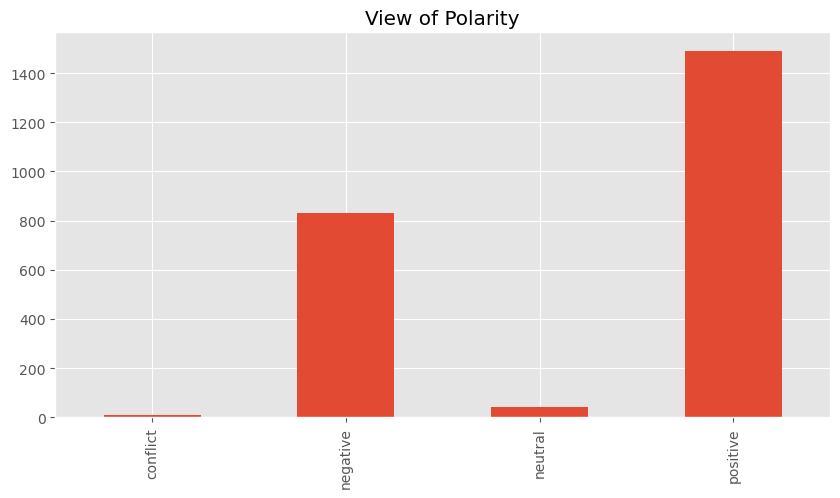

In [244]:
review_df['Polarity'].value_counts().sort_index().plot(kind='bar', title='View of Polarity', figsize=(10, 5))
plt.show()

In [245]:
# Parse the XML file
tree = ET.parse('Laptops_Train_p2.xml')

# Get the root element of the XML tree
root = tree.getroot()

# Iterate over the sentences and print their text
for review in root:
    for sentence in review.find('sentences'):
        sentence_text = sentence.find('text').text
        print(sentence_text)

len(root)

Most everything is fine with this machine: speed, capacity, build.
The only thing I don't understand is that the resolution of the screen isn't high enough for some pages, such as Yahoo!Mail.
Yes, I have it on the highest available setting.
I love the size, keyboard, the functions.
I don't really have a complaint.
It is easy to use, good quality and good price.
Perfect trifecta!
I would recommend this product.
I love this product because it is Toshiba and its 15.6".
It has no camera but, I can always buy and install one easy.
I had a USB connect but, i can't use it because it is not compatible.
That's the downside for me.
But, I would recommend this product.
I bought this laptop Was the worst Laptop I've ever bought.
I spent alot of money on this product and its been a nightmare.
And having to deal with the company has been a even worse nightmare.
I sent it to them to fix in perfect condition but for what was wrong with it.
They sent it back with a huge crack in it and it still didn't 

395

In [246]:
#Tokenize the Sentences

tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text.lower()
        opinions = sentence.find('Opinions')
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Print the tokens
        # print(tokens)


In [247]:

# Load the XML file
tree = ET.parse('Laptops_Train_p2.xml')
root = tree.getroot()

# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Get the set of English stopwords
stopword_set = set(stopwords.words('english'))

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Remove stopwords from the tokens
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_set]
        
        # Print the filtered tokens
        # print(filtered_tokens)


In [248]:

# # Create a tokenizer object
# tokenizer = nltk.tokenize.TreebankWordTokenizer()

# for review in root:
#     for sentence in review.find('sentences'):
#         text = sentence.find('text').text.lower()

# # Tokenize the sentence
#         tokens = tokenizer.tokenize(text)

# # Create a stemmer object
#         stemmer = PorterStemmer()

# # Stem the tokens
#         stemmed_tokens = [stemmer.stem(token) for token in tokens]

# # Print the stemmed tokens
#         print(stemmed_tokens)

#         stemmed_text = " ".join(stemmed_tokens)    
#         print(stemmed_text)
   

In [249]:
# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Tokenize the sentence
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()

        tokens = tokenizer.tokenize(text)

# Create a lemmatizer object
        lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Print the lemmatized tokens
        # print(lemmatized_tokens)

In [250]:

#download NLTK models for POS tagging
nltk.download('averaged_perceptron_tagger')

# parse the XML file and extract the sentences
tree = ET.parse('Laptops_Train_p2.xml')

# Get the root element of the XML tree
root = tree.getroot()

for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()
        print(text)

# Perform POS tagging on the sentences

        tokens = nltk.word_tokenize(text)
        pos_tags = nltk.pos_tag(tokens)
        # print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/motunrayo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


most everything is fine with this machine: speed, capacity, build.
the only thing i don't understand is that the resolution of the screen isn't high enough for some pages, such as yahoo!mail.
yes, i have it on the highest available setting.
i love the size, keyboard, the functions.
i don't really have a complaint.
it is easy to use, good quality and good price.
perfect trifecta!
i would recommend this product.
i love this product because it is toshiba and its 15.6".
it has no camera but, i can always buy and install one easy.
i had a usb connect but, i can't use it because it is not compatible.
that's the downside for me.
but, i would recommend this product.
i bought this laptop was the worst laptop i've ever bought.
i spent alot of money on this product and its been a nightmare.
and having to deal with the company has been a even worse nightmare.
i sent it to them to fix in perfect condition but for what was wrong with it.
they sent it back with a huge crack in it and it still didn't 

In [251]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    2373 non-null   object
 1   Sentence  2373 non-null   object
 2   Text      2373 non-null   object
 3   Polarity  2373 non-null   object
dtypes: object(4)
memory usage: 74.3+ KB


### Build the Classifier, Train and Evaluate the data

The Training dataset is splitted. Countvectorizer and Tfidfvectorizer was used to perform feature extraction and compared with each other. The training data was then trained using Naive Bayes Classifier. The confusion matrix and classification report was evaluated and countvectorizer performed better with the accuracy of 83% than tfidf in terms of accuracy. 

In [252]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

In [253]:
# Feature Selection using TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [254]:
#Feature selection
X_t = review_df['Text']
y_t = review_df['Polarity']

In [255]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_t, y_t, test_size = 0.2, random_state=42, shuffle=True)

In [256]:
print(y_t)

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
2368    negative
2369    negative
2370    negative
2371    negative
2372    negative
Name: Polarity, Length: 2373, dtype: object


In [257]:
# Perform feature extraction with the training using TF-IDF
tfidf = TfidfVectorizer()
X_trains_tfidf = tfidf.fit_transform(X_trains)


# Fit with the train data with test set
X_tests_tfidf = tfidf.transform(X_tests) 

In [258]:
# # Print the vocabulary and the document-term matrix
# print('Vocabulary:', tfidf.vocabulary_)

In [259]:
tfidf.get_feature_names_out()[:20]

array(['00', '04', '07', '09', '10', '100', '1024', '1080p', '10th', '11',
       '12', '1200bk', '1222nr', '13', '14', '15', '150', '1500', '16',
       '165'], dtype=object)

In [260]:
print(f'We have {len(tfidf.vocabulary_)} vocabulary words in our vectorizer')

We have 2938 vocabulary words in our vectorizer


In [261]:
print('Document-term matrix:', X_trains_tfidf.toarray())

Document-term matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Build Classifier using Naive Bayes Classifier and Logitic Regression.

In [262]:
# Feature Selection Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [263]:
#Feature selection
X_t = review_df['Text']
y_t = review_df['Polarity']

In [264]:
# Split the data into training and testing sets
X_trains, X_tests, y_trains, y_tests = train_test_split(X_t, y_t, test_size = 0.2, random_state=42, shuffle=True)

In [265]:
vectorizer = CountVectorizer()

# we fit the count vectorizer with the train data
X_train_counting = vectorizer.fit_transform(X_trains)

# we fit with the train data with test set
X_test_counting = vectorizer.transform(X_tests)                                           

In [266]:
# print(vectorizer.vocabulary_)

In [267]:
vectorizer.get_feature_names_out()[:20]

array(['00', '04', '07', '09', '10', '100', '1024', '1080p', '10th', '11',
       '12', '1200bk', '1222nr', '13', '14', '15', '150', '1500', '16',
       '165'], dtype=object)

In [268]:
print(f'We have {len(vectorizer.vocabulary_)} vocabulary words in our vectorizer')

We have 2938 vocabulary words in our vectorizer


In [269]:
print('Document-term matrix:', X_trains_tfidf.toarray())

Document-term matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [270]:
#Build a classifier
from sklearn.naive_bayes import MultinomialNB

In [271]:
# Train the Naive Bayes classifier
clft = MultinomialNB()

# Fit the model
clft.fit(X_train_counting, y_trains)

MultinomialNB()

In [272]:
#Evaluate Model on testing set
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [273]:
#Evaluate the classifier
y_pred_counts = clft.predict(X_test_counting)

# Print the Confusion Matrix
com = confusion_matrix(y_tests, y_pred_counts)
print("Confusion Matrix\n")
print(com)

Confusion Matrix

[[  0   1   0   1]
 [  0 104   0  70]
 [  0   0   0   6]
 [  0  26   0 267]]


In [274]:
cr = classification_report(y_tests, y_pred_counts)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

    conflict       0.00      0.00      0.00         2
    negative       0.79      0.60      0.68       174
     neutral       0.00      0.00      0.00         6
    positive       0.78      0.91      0.84       293

    accuracy                           0.78       475
   macro avg       0.39      0.38      0.38       475
weighted avg       0.77      0.78      0.77       475



/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [275]:
# Train the Naive Bayes classifier
tfidf_nb1 = MultinomialNB()

# Fit the model
tfidf_nb1.fit(X_trains_tfidf, y_trains)

MultinomialNB()

In [276]:
#Evaluate the classifier
y_pred_count = tfidf_nb1.predict(X_test_counting)

# Print the Confusion Matrix
com = confusion_matrix(y_tests, y_pred_count)
print("Confusion Matrix\n")
print(com)

Confusion Matrix

[[  0   0   0   2]
 [  0  62   0 112]
 [  0   0   0   6]
 [  0  10   0 283]]


In [277]:
# Print the Classification Report
cr = classification_report(y_tests, y_pred_count)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

    conflict       0.00      0.00      0.00         2
    negative       0.86      0.36      0.50       174
     neutral       0.00      0.00      0.00         6
    positive       0.70      0.97      0.81       293

    accuracy                           0.73       475
   macro avg       0.39      0.33      0.33       475
weighted avg       0.75      0.73      0.69       475



/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/motunrayo/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [278]:
#Feature selection
# X_t = review_df['Text']
# y_t = review_df['Polarity']

In [279]:
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(review_df['Text'])
# y = np.array(review_df['Polarity'])

In [280]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state=16)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

In [281]:
# Make predictions on the testing set and evaluate the accuracy
# y_pred = logreg.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

### Testing the Test set on the trained data.

The test data was tested and evaluated using the training data. The test data file was first parsed, the E#A pair was first assigned to a sentiment polarity label and printed out. Pre-processing such as tokenization, stop-words, lemmatization and POS tagg was performed on the test data. The trained data is then loaded and stored. 

In [282]:
# Test the classifier
import xml.etree.ElementTree as ET
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the XML file
tree = ET.parse('Laptops_Test_p2_gold.xml')
root = tree.getroot()

# Create an empty list to store the text data
review_lists = []
y_pred = []

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text
        review_lists.append(text)

In [283]:
# Load the XML file
tree = ET.parse('Laptops_Train_p2.xml')
root = tree.getroot()

review_lists = []
y_pred_st =[]

# Define a function to identify the dominant sentiment polarity of a set of opinions
def get_sentiment_polarity(opinions):
    polarities = [opinion.attrib['polarity'] for opinion in opinions]
    pos_num = polarities.count('positive')
    neg_num = polarities.count('negative')
    neu_num = polarities.count('neutral')
    conflict_num = polarities.count('conflict')
    if pos_num > neg_num and pos_num > neu_num and pos_num > conflict_num:
        return 'positive'
    elif neg_num > pos_num and neg_num > neu_num and neg_num > conflict_num:
        return 'negative'
    elif neu_num > pos_num and neu_num > neg_num and neu_num > conflict_num:
        return 'neutral'
    else:
        return 'conflict'

# Process each review
for review in root.findall('./Review'):
    review_id = review.attrib['rid']
    opinions = review.find('./Opinions')
    overall_sentiment = ''

    # Check if the category "LAPTOP#GENERAL" is included in the opinions
    laptop_general_opinions = opinions.findall("./Opinion[@category='LAPTOP#GENERAL']")
    if len(laptop_general_opinions) > 0:
        overall_sentiment = get_sentiment_polarity(laptop_general_opinions)
    
    # Process each sentence
    for sentence in review.findall('./sentences/sentence'):
        sentence_id = sentence.attrib['id']
        sentence_text = sentence.find('./text').text
        sentence_opinions = opinions.findall("./Opinion[@target='#" + sentence_id + "']")

        # Check if there are opinions for the sentence
        if len(sentence_opinions) > 0:
            sentiment_label = get_sentiment_polarity(sentence_opinions)
        else:
            sentiment_label = 'neutral'
        
        # If there is an overall sentiment, assign it to the sentence
        if overall_sentiment != '':
            sentiment_label = overall_sentiment
        
        y_pred_st.append({'Review': review_id, 'Sentence': sentence_id, 'Text': sentence_text, 'Polarity': sentiment_label})

In [284]:
# Convert the list of dictionaries to a pandas DataFrame and save to a CSV file
review_df = pd.DataFrame(y_pred_st)
review_df.to_csv('sentiment_labels.csv', index=False)

In [285]:
# Convert the results list to a dataframe
review_df = pd.DataFrame(y_pred_st)

# Extract entity, attribute, and text columns and create a new dataframe
sentiment1_df = review_df[['Text', 'Polarity']]

    # Print the opinions values in a table format
print(tabulate(sentiment1_df, headers='keys', tablefmt='psql'))

+------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|      | Text                                                                                                                                                                                                                                                                                                                                                                                                             | Polarity   |
|------+----------------------------------------------------------------------------------------------------------------------------------------------

In [286]:
# Parse the XML file
tree = ET.parse('Laptops_Test_p2_gold.xml')

# Get the root element of the XML tree
root = tree.getroot()

# Iterate over the sentences and print their text
for review in root:
    for sentence in review.find('sentences'):
        sentence_text = sentence.find('text').text
        print(sentence_text)

len(root)

Well, my first apple computer and I am impressed.
Works well, fast and no reboots.
Waiting to install MS Office and see how it goes from there.
Have always been a PC guy, but decided to try Apple.
Glad I did so far.
s.... L .... o..... w....  rea......llllyy  slow.
like seriously  - really slow.
impossible to use.
cant even read properly.
plus - no russian input ??  wtf
What a great laptop, I can run my games and work really fast.
Really light you can carry with you everywhere.
Great battery life.
Everything at a very great price.
I completely recommend it.
Excellent value and a must buy for someone looking for a Macbook.
You can't get any better than this price and it come with an internal disk drive.
All the newer MacBooks do not.
Plus you get 500GB which is also a great feature.
Also, the resale value on this will keep.
I highly recommend you get one before they are gone.
Literally, it stays much cooler than my old macbook pro.
The old unibody macbook pro could fry an egg after a wh

80

In [287]:
#Tokenize the Sentences

tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text.lower()
        opinions = sentence.find('Opinions')
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Print the tokens
        print(tokens)


['well', ',', 'my', 'first', 'apple', 'computer', 'and', 'i', 'am', 'impressed', '.']
['works', 'well', ',', 'fast', 'and', 'no', 'reboots', '.']
['waiting', 'to', 'install', 'ms', 'office', 'and', 'see', 'how', 'it', 'goes', 'from', 'there', '.']
['have', 'always', 'been', 'a', 'pc', 'guy', ',', 'but', 'decided', 'to', 'try', 'apple', '.']
['glad', 'i', 'did', 'so', 'far', '.']
['s', '...', '.', 'l', '...', '.', 'o', '...', '..', 'w', '...', '.', 'rea', '...', '...', 'llllyy', 'slow', '.']
['like', 'seriously', '-', 'really', 'slow', '.']
['impossible', 'to', 'use', '.']
['cant', 'even', 'read', 'properly', '.']
['plus', '-', 'no', 'russian', 'input', '?', '?', 'wtf']
['what', 'a', 'great', 'laptop', ',', 'i', 'can', 'run', 'my', 'games', 'and', 'work', 'really', 'fast', '.']
['really', 'light', 'you', 'can', 'carry', 'with', 'you', 'everywhere', '.']
['great', 'battery', 'life', '.']
['everything', 'at', 'a', 'very', 'great', 'price', '.']
['i', 'completely', 'recommend', 'it', '.']


In [288]:

nltk.download('stopwords')
  
# Load the XML file
tree = ET.parse('Laptops_Test_p2_gold.xml')
root = tree.getroot()

# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Get the set of English stopwords
stopword_set = set(stopwords.words('english'))

# Iterate through each review and its sentences
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()
        
        # Tokenize the sentence
        tokens = tokenizer.tokenize(text)
        
        # Remove stopwords from the tokens
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_set]
        
        # Print the filtered tokens
        print(filtered_tokens)


['well', ',', 'first', 'apple', 'computer', 'impressed', '.']
['works', 'well', ',', 'fast', 'reboots', '.']
['waiting', 'install', 'ms', 'office', 'see', 'goes', '.']
['always', 'pc', 'guy', ',', 'decided', 'try', 'apple', '.']
['glad', 'far', '.']
['...', '.', 'l', '...', '.', '...', '..', 'w', '...', '.', 'rea', '...', '...', 'llllyy', 'slow', '.']
['like', 'seriously', '-', 'really', 'slow', '.']
['impossible', 'use', '.']
['cant', 'even', 'read', 'properly', '.']
['plus', '-', 'russian', 'input', '?', '?', 'wtf']
['great', 'laptop', ',', 'run', 'games', 'work', 'really', 'fast', '.']
['really', 'light', 'carry', 'everywhere', '.']
['great', 'battery', 'life', '.']
['everything', 'great', 'price', '.']
['completely', 'recommend', '.']
['excellent', 'value', 'must', 'buy', 'someone', 'looking', 'macbook', '.']
['ca', "n't", 'get', 'better', 'price', 'come', 'internal', 'disk', 'drive', '.']
['newer', 'macbooks', '.']
['plus', 'get', '500gb', 'also', 'great', 'feature', '.']
['also',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/motunrayo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [289]:
nltk.download('omw-1.4')

# Create a tokenizer object
tokenizer = nltk.tokenize.TreebankWordTokenizer()

# Tokenize the sentence
for review in root:
    for sentence in review.find('sentences'):
        text = sentence.find('text').text.lower()

        tokens = tokenizer.tokenize(text)

# Create a lemmatizer object
        lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Print the lemmatized tokens
        print(lemmatized_tokens)

['well', ',', 'my', 'first', 'apple', 'computer', 'and', 'i', 'am', 'impressed', '.']
['work', 'well', ',', 'fast', 'and', 'no', 'reboots', '.']
['waiting', 'to', 'install', 'm', 'office', 'and', 'see', 'how', 'it', 'go', 'from', 'there', '.']
['have', 'always', 'been', 'a', 'pc', 'guy', ',', 'but', 'decided', 'to', 'try', 'apple', '.']
['glad', 'i', 'did', 'so', 'far', '.']
['s', '...', '.', 'l', '...', '.', 'o', '...', '..', 'w', '...', '.', 'rea', '...', '...', 'llllyy', 'slow', '.']
['like', 'seriously', '-', 'really', 'slow', '.']
['impossible', 'to', 'use', '.']
['cant', 'even', 'read', 'properly', '.']
['plus', '-', 'no', 'russian', 'input', '?', '?', 'wtf']
['what', 'a', 'great', 'laptop', ',', 'i', 'can', 'run', 'my', 'game', 'and', 'work', 'really', 'fast', '.']
['really', 'light', 'you', 'can', 'carry', 'with', 'you', 'everywhere', '.']
['great', 'battery', 'life', '.']
['everything', 'at', 'a', 'very', 'great', 'price', '.']
['i', 'completely', 'recommend', 'it', '.']
['exc

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/motunrayo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [290]:
#Build a classifier
from sklearn.naive_bayes import MultinomialNB

In [291]:
# Load the trained classifier and vectorizer
clft = MultinomialNB()
clft.fit(X_train_counting, y_trains)

# Save the trained model and vectorizer
joblib.dump(clft, 'classifier.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

# Load the saved model and vectorizer
clft = joblib.load('classifier.joblib')
vectorizer = joblib.load('vectorizer.joblib')

In [292]:
X_test_vectrs = vectorizer.transform(review_df)

# Make a prediction on the text data
y_preds_st = clft.predict(X_test_vectrs)

# Convert the results list to a dataframe
result1_df = pd.DataFrame(review_df, y_preds_st)

In [293]:
# sentiment1_df = review_df[['Text', 'Polarity']]
print(tabulate(result_df, headers='keys', tablefmt='psql'))

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|          | 0                                                                                                                                                                                                                                                                                                                                    |
|----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [294]:
#Evaluate Model on testing set
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [295]:
# Load the trained classifier and vectorizer
# y_preds = clft.predict(X_test_vectrs)

In [296]:
# Load the trained classifier and vectorizer
y_preds = tfidf_nb1.predict(X_test_vectrs)

In [297]:
# Print the Confusion Matrix
# cm = confusion_matrix(y_pred_st, y_preds)
# print("Confusion Matrix\n")
# print(cm)

In [298]:
# Print the Classification Report
# cr = classification_report(y_pred_st, y_preds)
# print("\n\nClassification Report\n")
# print(cr)

In [299]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [300]:
# sia.Polarity